### Importing all the necessay libraries for the Script

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Harsh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Harsh Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Harsh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Harsh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Reading the Datasets

In [4]:
data1 = pd.read_csv("../Project/sentimentdataset.csv")
data2 = pd.read_csv("../Project/synthetic_social_media_data.csv")

In [7]:
data1.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [9]:
data2.head()

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


### Filtering the data to limit it at twitter from data1 and textual from data2
### But it is seen that a few of the important features/columns have unnecessary blank spaces as suffixes and prefixes which may cause issues with filtering so lets remove them first 

In [12]:
print(data1["Platform"].unique())
data1['Platform'] = data1["Platform"].str.strip()
print(data1["Platform"].unique())

[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']
['Twitter' 'Instagram' 'Facebook']


In [14]:
data1 = data1[data1['Platform'] == 'Twitter']
data2 = data2[data2['Post Type'] == 'text']

In [16]:
print(data1["Sentiment"].unique())
data1['Sentiment'] = data1["Sentiment"].str.strip()
print(data1["Sentiment"].unique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Disgust      ' ' Love         ' ' Admiration   ' ' Disappointed '
 ' Adoration    ' ' Calmness     ' ' Kind         ' ' Acceptance   '
 ' Bitter       ' ' Excitement ' ' Shame ' ' Elation       '
 ' Serenity      ' ' Empowerment   ' ' Arousal       ' ' Reverence     '
 ' Contentment   ' ' Hope          ' ' Tenderness    ' ' Fulfillment  '
 ' Reverence ' ' Fulfillment   ' ' Despair         ' ' Jealousy        '
 ' Boredom         ' ' Helplessness    ' ' Disgust         '
 ' Loneliness ' ' Frustration ' ' Intimidation ' ' Regret         '
 ' Grief           ' ' Resentment      ' ' Curiosity       '
 ' Numbness        ' ' Ambivalence     ' ' Serenity        '
 ' Confusion       ' ' Nostalgia       ' ' Determination   '
 ' Indifference    ' ' Melancholy      ' ' Acceptance      ' ' Zest '
 ' Proud ' ' Compassionate ' ' Inspired ' ' Serenity ' ' Grateful '
 ' Free-spirited ' ' Hopeful ' ' Apprehensive ' ' Devastated '
 ' Dismiss

#### Since the data1 has a lot of different sentiments associated with the text we will define a mapping of sentiments to categories of Positive, Negative, and Neutral. And apply the mapping to the data1 and verify it

In [19]:
sentiment_mapping = {
    'Positive': 'Positive', 'Negative': 'Negative', 'Neutral': 'Neutral', 'Anger': 'Negative', 'Disgust': 'Negative',  'Love': 'Positive',  
    'Admiration': 'Positive', 'Disappointed': 'Negative', 'Adoration': 'Positive', 'Calmness': 'Positive', 'Kind': 'Positive', 'Acceptance': 'Positive', 
    'Bitter': 'Negative', 'Excitement': 'Positive', 'Shame': 'Negative', 'Elation': 'Positive', 'Serenity': 'Positive', 'Empowerment': 'Positive', 
    'Arousal': 'Neutral', 'Reverence': 'Positive', 'Contentment': 'Positive', 'Hope': 'Positive', 'Tenderness': 'Positive', 'Fulfillment': 'Positive',
    'Despair': 'Negative', 'Jealousy': 'Negative', 'Boredom': 'Negative', 'Helplessness': 'Negative', 'Loneliness': 'Negative', 
    'Frustration': 'Negative', 'Intimidation': 'Negative', 'Regret': 'Negative', 'Grief': 'Negative', 'Resentment': 'Negative', 'Curiosity': 'Neutral', 
    'Numbness': 'Negative', 'Ambivalence': 'Negative', 'Confusion': 'Neutral', 'Nostalgia': 'Neutral', 'Determination': 'Positive', 
    'Indifference': 'Negative', 'Melancholy': 'Negative', 'Zest': 'Positive', 'Proud': 'Positive', 'Compassionate': 'Positive', 'Inspired': 'Positive',
    'Grateful': 'Positive', 'Free-spirited': 'Positive', 'Hopeful': 'Positive', 'Apprehensive': 'Negative', 'Devastated': 'Negative',
    'Dismissive': 'Negative', 'Fearful': 'Negative', 'Jealous': 'Negative', 'Envious': 'Negative', 'Bitterness': 'Negative', 'Frustrated': 'Negative',
    'Gratitude': 'Positive', 'Overjoyed': 'Positive', 'Contemplation': 'Neutral', 'Satisfaction': 'Positive', 'Anticipation': 'Positive',
    'Appreciation': 'Positive', 'Enthusiasm': 'Positive',  'Wonderment': 'Positive', 'Happiness': 'Positive', 'Intrigue': 'Neutral', 
    'DreamChaser': 'Positive', 'Pensive': 'Neutral', 'Creativity': 'Positive', 'Rejuvenation': 'Positive', 'Adventure': 'Positive', 
    'Melodic': 'Positive', 'Freedom': 'Positive', 'Reflection': 'Neutral', 'ArtisticBurst': 'Positive', 'CulinaryOdyssey': 'Positive',  
    'Immersion': 'Positive', 'Betrayal': 'Negative', 'Disappointment': 'Negative', 'Sorrow': 'Negative', 'Ruins': 'Negative', 'Desolation': 'Negative',
    'Heartbreak': 'Negative', 'Resilience': 'Positive', 'Loss': 'Negative', 'Joy': 'Positive', 'Surprise': 'Neutral', 'Inspiration': 'Positive', 
    'Exploration': 'Positive', 'Amazement': 'Positive', 'Captivation': 'Positive', 'Awe': 'Positive', 'Energy': 'Positive', 'Charm': 'Positive',
    'Pride': 'Positive', 'Iconic': 'Positive', 'Thrill': 'Positive', 'Obstacle': 'Negative', 'Renewed Effort': 'Positive', 'Breakthrough': 'Positive', 
    'Envisioning History': 'Positive', 'Mesmerizing': 'Positive', 'Thrilling Journey': 'Positive',  'Creative Inspiration': 'Positive', 
    'Whispers of the Past': 'Neutral', 'Embarrassed': 'Negative', 'Mischievous': 'Neutral', 'Sad': 'Negative', 'Bad': 'Negative','Hate': 'Negative', 
    'Happy': 'Positive'
}

data1['Sentiment'] = data1['Sentiment'].map(sentiment_mapping)
data1["Sentiment"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

#### Keeping only the relevant columns from the two dataframes which can be used later, such as the no. of likes, comments, retweets, timestamps, etc. And renaming them for better understandability/clearity

In [22]:
print("columns names before\n")
print(data1.columns)
print(data2.columns)

data1 = data1[['Text', 'Sentiment', 'Retweets', 'Likes', 'Timestamp', 'Hashtags', 'Hour']]
data2 = data2[['Post Content', 'Sentiment Label', 'Number of Shares', 'Number of Likes', 'Number of Comments', 'User Follower Count', 'Post Date and Time']]

print("\ncolumns names after\n")
print(data1.columns)
print(data2.columns)

data1.columns = ['text', 'sentiment', 'retweets', 'likes', 'timestamp', 'hashtags', 'hour']
data2.columns = ['text', 'sentiment', 'retweets', 'likes', 'comments', 'follower_count', 'timestamp']

# Verifying the column names
print("column names after renaming")
print(data1.columns)
print(data2.columns)

columns names before

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Index(['Post ID', 'Post Content', 'Sentiment Label', 'Number of Likes',
       'Number of Shares', 'Number of Comments', 'User Follower Count',
       'Post Date and Time', 'Post Type', 'Language'],
      dtype='object')

columns names after

Index(['Text', 'Sentiment', 'Retweets', 'Likes', 'Timestamp', 'Hashtags',
       'Hour'],
      dtype='object')
Index(['Post Content', 'Sentiment Label', 'Number of Shares',
       'Number of Likes', 'Number of Comments', 'User Follower Count',
       'Post Date and Time'],
      dtype='object')
column names after renaming
Index(['text', 'sentiment', 'retweets', 'likes', 'timestamp', 'hashtags',
       'hour'],
      dtype='object')
Index(['text', 'sentiment', 'retweets', 'likes', 'comments', 'follower_count',
       'timesta

### Now after the relevant columns have been selected let's try to add the similar columns in both the datasets so that we can concatinate them without losing any important data

#### Extracting the time component from the timestamp as some Tweets posted during peak hours (e.g. evenings or night) may get more engagement due to increased user activity. Tweets that align with trending topics or events might perform differently depending on the time of day.

In [26]:
data1['timestamp'] = pd.to_datetime(data1['timestamp'])
data2['timestamp'] = pd.to_datetime(data2['timestamp'])
data2['hour'] = data2['timestamp'].dt.hour

In [28]:
# Going through a few rows for the dataset to get an idea if any feature such as hashtags/mentions can be extracted or not
print("data1")
for x,i in data1.iterrows():
    print(x, i['text']+"\n")
    if x == 8:
        break
print("data2")
for x,i in data2.iterrows():
    print(x, i['text']+"\n")
    if x == 15:
        break

data1
0  Enjoying a beautiful day at the park!              

1  Traffic was terrible this morning.                 

5  Feeling grateful for the little things in life.    

8  Political discussions heating up on the timeline.  

data2
3 Individual from news third. Oil forget them different account skin.
White vote stop region building. Try direction amount eight second amount support trial.
Kid rather always. Real energy television majority hold meeting everybody.

10 Audience away easy light federal institution. Available sign social affect now scene. Matter vote citizen people probably like along travel.
Carry health the happen term modern. Boy course often brother. Environmental rich again. Economic police which decide.

12 Listen middle general over right local cup. Big mean southern music recent. General police possible game.
Fund continue amount great eight keep how hard. Everyone audience base our property. Mind offer require positive.

15 Often blood floor might development. S

### Since it is observed that the actual text in our collective dataset does not contain hashtags or any indication of a particular phrase being a hashtag, it becomes extremely complicated to decide/decipher which word to consider as a hashtag in the text given by the user (because not only the selection of a hashtag is very subjective to each individual but also few post may or may not include any hashtags)
### Thus, we can drop the consideration for the hashtag column altogether while training the model for virality or perform feature engineering and try to develop a method to extract realistic hashtags from the text 
data1 = data1.drop(columns = 'hashtags')

In [31]:
# Hashtags extraction

def extract_hashtags(text):
    # Converting the text to lower case and tokenizing it 
    tokens = word_tokenize(text.lower())
    
    # Define specific multi-word expressions that are common but not captured by bigrams
    mwetokenizer = MWETokenizer(separator='')
    
    # Re-tokenizing the text using the MWE tokenizer to capture multi-word phrases if any were specified
    tokens = mwetokenizer.tokenize(tokens)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    
    # Part-of-speech tagging
    tagged = pos_tag(tokens)
    
    # Selecting nouns and adjectives
    hashtags = [f"#{re.sub(r'\W+', '', word)}" for word, tag in tagged if tag.startswith('NN') or tag.startswith('JJ')]
    
    # Ensuring all the hashtags are unique
    hashtags = list(set(hashtags))
    
    # Returning the first 3 probable hashtags
    return hashtags[:3]

data2['hashtags'] = data2['text'].apply(extract_hashtags)

#### After the missing columns hashtag in the data2 was added we will add the column comment and follower counts in the data1 to avoid discrepancies and initialize them to none. 
#### Once this task is completed we can concatenate the two dataframes together to get one single dataframe to work on

In [33]:
data1['comments'] = None
data1['follower_count'] = None

# Aligning columns
columns_order = ['text', 'sentiment', 'retweets', 'likes', 'comments', 'follower_count', 'timestamp', 'hour', 'hashtags']
data1 = data1[columns_order]
data2 = data2[columns_order]

data = pd.concat([data1, data2], ignore_index=True)

### We had initialized the comments and follower_counts columns as none earlier, hence will have emplty values in these columns of the combined dataframe.
#### As the no. of these emplty space is significant we cannot simply drop these instaces so instead we replace them with the mean of their columns

In [37]:
data[data['comments'].isna()==True].count()
data['comments'] = data['comments'].fillna(np.mean(data['comments']))
data['follower_count'] = data['follower_count'].fillna(np.mean(data['follower_count']))

C:\Users\Harsh Sharma\AppData\Local\Temp\ipykernel_1768\3263156317.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['comments'] = data['comments'].fillna(np.mean(data['comments']))
C:\Users\Harsh Sharma\AppData\Local\Temp\ipykernel_1768\3263156317.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['follower_count'] = data['follower_count'].fillna(np.mean(data['follower_count']))


### We know that virality depends on various aspects such but with the datasetpresent it is most suitable to get virality in terms of engagement (i.e. No. of likes, comments, retweets)
### So we extract the virality feature using these three features from the dataset and also classify them under high, low and medium.

#### These features can vary in no. (values) quite a bit so we normalize them before using them for virality, and also as they are quite different from each other in terms of a post getting viral/engagement (i.e. a post will get more engagement if it is shared/retweeted as compared to the post just getting likes), so we will assign some weights to each of them.

In [40]:
# Normalizing the metrics using MinMaxScaler
scaler = MinMaxScaler()
data[['likes_scaled', 'comments_scaled', 'retweets_scaled']] = scaler.fit_transform(data[['likes', 'comments', 'retweets']])

weights = {
    'likes': 0.3,      
    'comments': 0.4,   
    'retweets': 0.5    
}

# Calculating the weighted virality score
data['virality'] = (
    weights['likes'] * data['likes_scaled'] +
    weights['comments'] * data['comments_scaled'] +
    weights['retweets'] * data['retweets_scaled']
)

# Putting virality score into categories (e.g., low, medium, high)
data['reach'] = pd.cut(data['virality'], bins=3, labels=['Low', 'Medium', 'High'])

#### Resetting the index

In [43]:
data = data.reset_index()
data = data.drop(columns='index')
data

,text,sentiment,retweets,likes,comments,follower_count,timestamp,hour,hashtags,likes_scaled,comments_scaled,retweets_scaled,virality,reach
0,Enjoying a beautiful day at the park! ...,Positive,15.0,30.0,101.66,5020.526154,2023-01-15 12:30:00,12,#Nature #Park,0.027163,0.5083,0.030,0.226469,Low
1,Traffic was terrible this morning. ...,Negative,5.0,10.0,101.66,5020.526154,2023-01-15 08:45:00,8,#Traffic #Morning,0.007042,0.5083,0.010,0.210433,Low
2,Feeling grateful for the little things in lif...,Positive,25.0,50.0,101.66,5020.526154,2023-01-16 09:10:00,9,#Gratitude #PositiveVibes,0.047284,0.5083,0.050,0.242505,Low
3,Political discussions heating up on the timel...,Negative,30.0,60.0,101.66,5020.526154,2023-01-17 08:00:00,8,#Politics #Debate,0.057344,0.5083,0.060,0.250523,Low
4,Feeling a bit under the weather today. ...,Negative,7.0,15.0,101.66,5020.526154,2023-01-18 10:30:00,10,#SickDay #Health,0.012072,0.5083,0.014,0.213942,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Sound work commercial now. Business ready cont...,Positive,304.0,87.0,102.00,4995.000000,2024-06-25 11:30:29,11,"[#management, #easy, #institution]",0.084507,0.5100,0.608,0.533352,Medium
889,Road book line station level brother fall. Tri...,Neutral,334.0,747.0,19.00,322.000000,2024-07-21 14:28:27,14,"[#line, #court, #future]",0.748491,0.0950,0.668,0.596547,Medium
890,Suffer song every real section foreign. Risk m...,Neutral,10.0,356.0,83.00,5343.000000,2024-07-26 02:57:41,2,"[#song, #section, #officer]",0.355131,0.4150,0.020,0.282539,Low
891,Sit establish turn. Early official wrong dog.\...,Positive,353.0,351.0,44.00,7551.000000,2024-08-07 09:47:45,9,"[#future, #page, #entire]",0.350101,0.2200,0.706,0.546030,Medium


### Extracting the Sentiments from the text in the dataset and then mapping it to numerical data so that it can be better fitted as a feature to the models

In [46]:
# Initializing the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each row's text column in the dataset
data['sentiment'] = data['text'].apply(get_sentiment)

sentiment_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

### Trying to see if there's any pattern that can be obtained

In [49]:
data.head(2)

,text,sentiment,retweets,likes,comments,follower_count,timestamp,hour,hashtags,likes_scaled,comments_scaled,retweets_scaled,virality,reach
0,Enjoying a beautiful day at the park! ...,0,15.0,30.0,101.66,5020.526154,2023-01-15 12:30:00,12,#Nature #Park,0.027163,0.5083,0.03,0.226469,Low
1,Traffic was terrible this morning. ...,1,5.0,10.0,101.66,5020.526154,2023-01-15 08:45:00,8,#Traffic #Morning,0.007042,0.5083,0.01,0.210433,Low


In [51]:
# Descriptive statistics for numerical features
desc_stats = data.describe()
desc_stats

,sentiment,retweets,likes,comments,follower_count,timestamp,hour,likes_scaled,comments_scaled,retweets_scaled,virality
count,893.000000,893.000000,893.000000,893.000000,893.000000,893,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.339306,192.582307,374.770437,101.660000,5020.526154,2023-05-28 13:33:00.381859072,12.477044,0.374015,0.508300,0.385165,0.508107
min,0.000000,0.000000,3.000000,0.000000,3.000000,2010-05-15 15:30:00,0.000000,0.000000,0.000000,0.000000,0.076290
25%,0.000000,26.000000,50.000000,69.000000,3393.000000,2023-08-28 16:00:00,8.000000,0.047284,0.345000,0.052000,0.247014
50%,0.000000,162.000000,328.000000,101.660000,5020.526154,2024-03-22 15:26:37,13.000000,0.326962,0.508300,0.324000,0.518151
75%,1.000000,336.000000,630.000000,135.000000,6745.000000,2024-06-12 08:00:31,18.000000,0.630785,0.675000,0.672000,0.696974
max,2.000000,500.000000,997.000000,200.000000,9918.000000,2024-09-06 14:07:02,23.000000,1.000000,1.000000,1.000000,1.084270
std,0.602862,161.718383,311.656355,50.487399,2489.369768,NaN,6.545869,0.313538,0.252437,0.323437,0.237916


Calculating and printing the descriptive statistics for numerical features in the dataset. It provides a summary including count, mean, standard deviation, minimum, maximum, and quartile values for each column. 

These statistics help to quickly identify the range of data, detect any possible errors (e.g., unexpected negative numbers in counts of likes or retweets), and understand the central tendency and dispersion of the data.

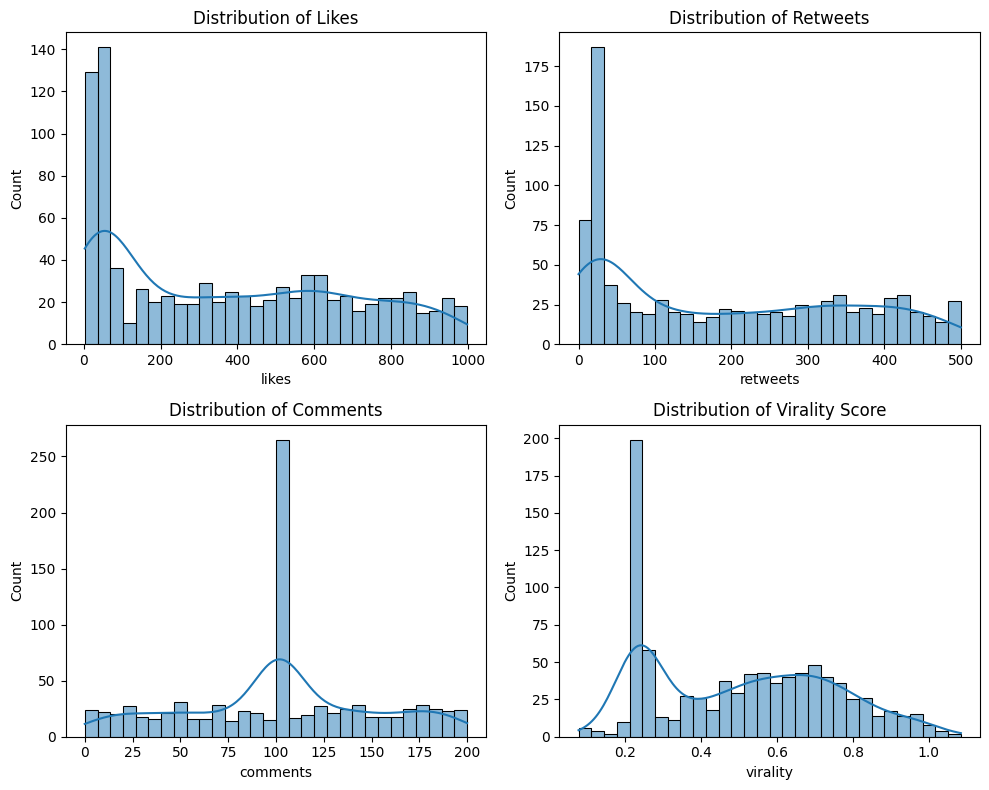

In [54]:
# Distribution plots for key engagement metrics
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data['likes'], ax=ax[0, 0], bins=30, kde=True)
ax[0, 0].set_title('Distribution of Likes')

sns.histplot(data['retweets'], ax=ax[0, 1], bins=30, kde=True)
ax[0, 1].set_title('Distribution of Retweets')

sns.histplot(data['comments'], ax=ax[1, 0], bins=30, kde=True)
ax[1, 0].set_title('Distribution of Comments')

sns.histplot(data['virality'], ax=ax[1, 1], bins=30, kde=True)
ax[1, 1].set_title('Distribution of Virality Score')

plt.tight_layout()
plt.show()

These plots help visualize the distribution of data points and identify skewness or outliers. For instance, a right-skewed distribution in likes could indicate that most posts receive a few likes, while a small number of posts receive many, potentially signaling viral content or influential users.
one observation is the only comments distribution is somewhat similar to symmetric.

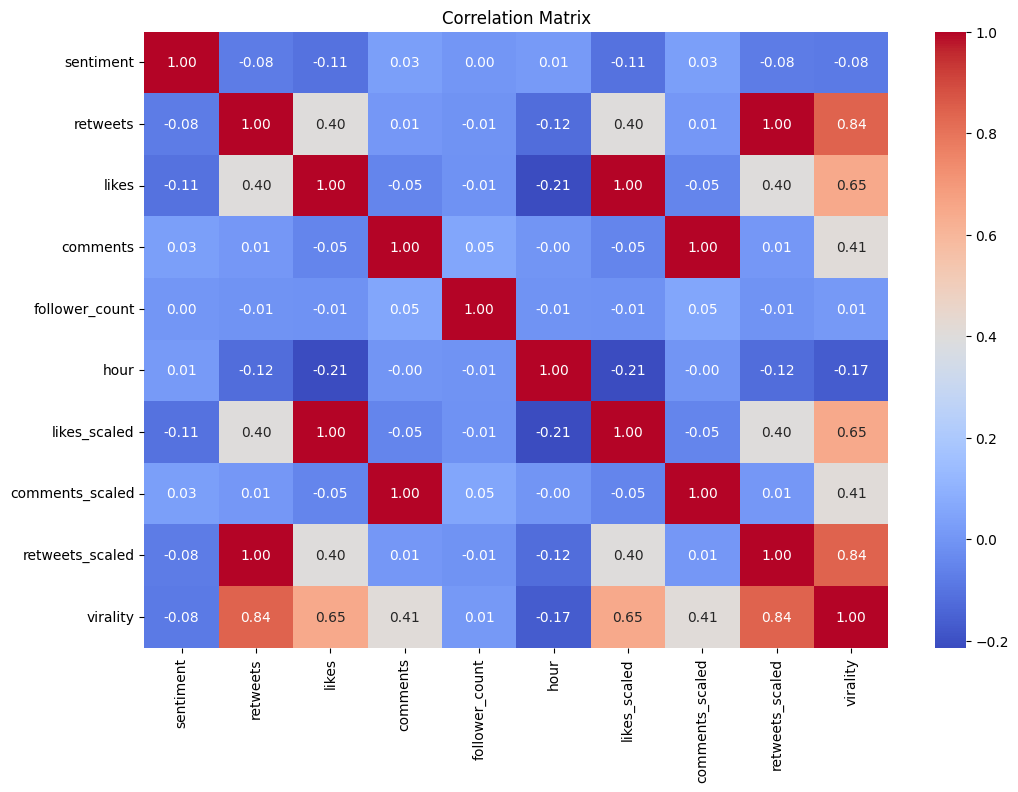

In [57]:
# Correlation matrix of numerical features
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


This correlation matrix helps identify the strength and direction of relationships between variables. For example, a high positive correlation between likes and retweets could suggest that posts that get more likes also tend to be shared more often or vice-versa, implying that likes and retweets are related to each other.

Similarly, it can be seen that likes and retweets somewhat relates to the hour of the post.

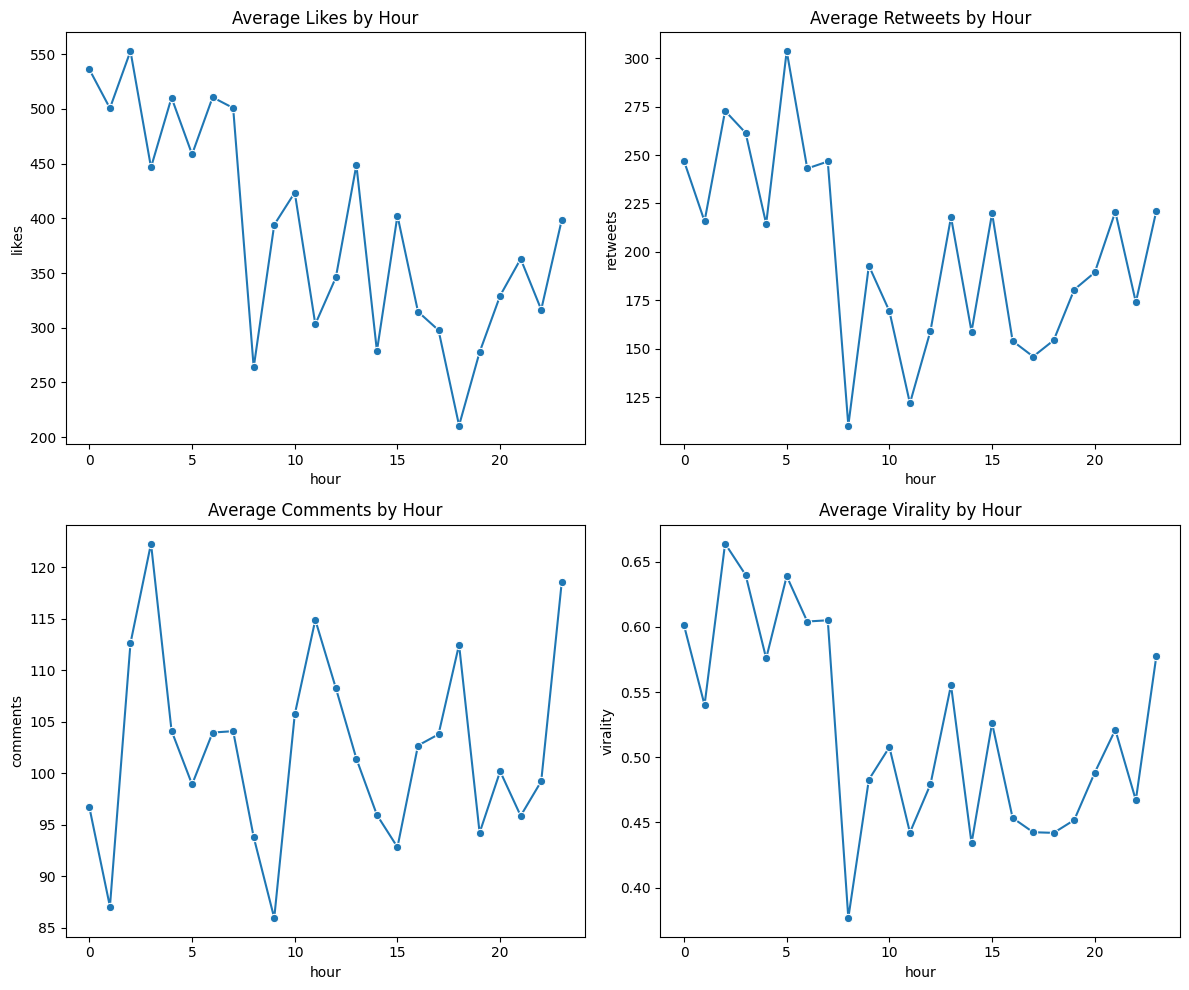

In [60]:
# Grouping data by hour to see average engagements i.e. average likes, retweets, comments and virality
hourly_data = data.groupby('hour').agg({'likes':'mean', 'retweets':'mean', 'comments':'mean', 'virality':'mean'}).reset_index()

# Plotting time-based visualizations
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.lineplot(data=hourly_data, x='hour', y='likes', ax=ax[0, 0], marker='o')
ax[0, 0].set_title('Average Likes by Hour')

sns.lineplot(data=hourly_data, x='hour', y='retweets', ax=ax[0, 1], marker='o')
ax[0, 1].set_title('Average Retweets by Hour')

sns.lineplot(data=hourly_data, x='hour', y='comments', ax=ax[1, 0], marker='o')
ax[1, 0].set_title('Average Comments by Hour')

sns.lineplot(data=hourly_data, x='hour', y='virality', ax=ax[1, 1], marker='o')
ax[1, 1].set_title('Average Virality by Hour')

plt.tight_layout()
plt.show()


These insights are useful for determining optimal posting times. For instance, it can be seen that posts made during the early hours i.e. early morning or late night tend to go more engagement in every aspect, this can guide content scheduling strategies to maximize reach and interaction.

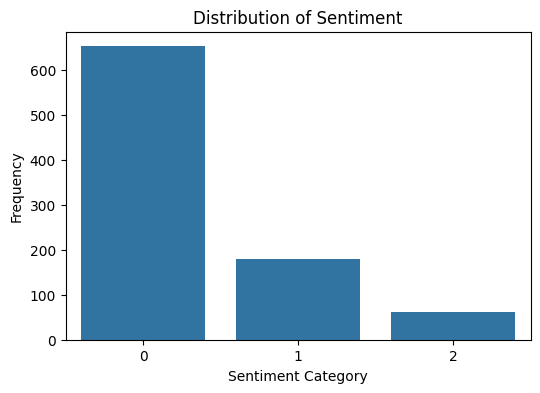

In [63]:
# Distribution of sentiment
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x=data['sentiment'], ax=ax)
ax.set_title('Distribution of Sentiment')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Frequency')
plt.show()


This visualization is useful for understanding the general mood or tone prevalent in the dataset. A predominance of positive sentiment might indicate general satisfaction or happiness among the user base.

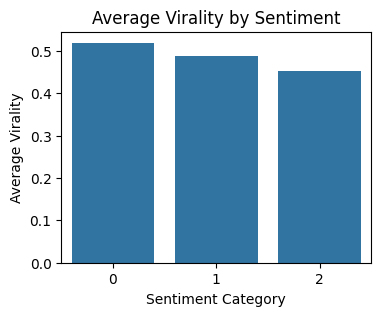

In [66]:
# Grouping data by sentiment and calculating the average virality
sentiment_virality = data.groupby('sentiment')['virality'].mean().reset_index()

# Plotting
plt.figure(figsize=(4, 3))
sns.barplot(data=sentiment_virality, x='sentiment', y='virality')
plt.title('Average Virality by Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Virality')
plt.show()


By analyzing the average virality across different sentiment categories, we can determine that neither of the positive, negative, or neutral sentiments is more likely to go viral. As all three sentiments are almost similar to each other in terms of getting viral

Since it was observed earlier that the no. of posts is in order of 

    Positive > Negative > Neutral
And vary quite a bit from each other so it is expected to have this trend in the Average Virality by Sentiment

### Virality/Engagement Prediction

#### 1. Feature and target variable selection

In [71]:
X = data[['text', 'sentiment', 'follower_count', 'hour', 'hashtags']] # Features
y = data['reach']  # Target variable (low, medium, high) 
# We can also change the target variable to virality which will change this classification problem to a regression problem.

#### 2. Creating a preprocessor to perform the preprocessing on the feature columns for multiple models to test

In [74]:
# Define column transformer for preprocessing
#  ColumnTransformer combines all preprocessing steps into one unified transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000), 'text'), # Text preprocessing
        ('sentiment', OneHotEncoder(), ['sentiment']), # Encode sentiment
        ('hashtags', TfidfVectorizer(max_features=1000, tokenizer=lambda x: x, preprocessor=lambda x: x), 'hashtags'),  # Vectorize pre-extracted hashtags
        ('num', MinMaxScaler(), ['follower_count', 'hour']) # Scale numerical features
    ]
)

#### 3. We create different pipelines for different classification models and test them

##### a) Random Forest Classification :
Random Forest is an ensemble method that combines predictions from many decision trees to improve the accuracy of prediction and avoid overfitting. The trees are constructed based on a subset of features and data samples. The predictions are aggregated using majority voting.

In [78]:
# Define the model pipeline
# Pipeline combines the preprocessing (preprocessor) and model (RandomForestClassifier) into a single workflow.
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=27)) # Use Classifier
])

# Split data and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

rf.fit(X_train, y_train)

# Evaluating the model's accuracy and looking at its classification report
y_pred = rf.predict(X_test)

accuracy_RFC = rf.score(X_test, y_test)*100
print("Model Accuracy:", accuracy_RFC)

print(classification_report(y_test, y_pred))

C:\Users\Harsh Sharma\Downloads\NEU\Fall 2024 Sem 1\DS 5110 Intro to Data Processing and Management\Project\idmpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model Accuracy: 70.94972067039106
              precision    recall  f1-score   support

        High       0.31      0.12      0.17        33
         Low       0.96      0.77      0.85        64
      Medium       0.64      0.90      0.75        82

    accuracy                           0.71       179
   macro avg       0.64      0.60      0.59       179
weighted avg       0.70      0.71      0.68       179



#### OUTPUT:
Random Forest recorded 68.71% Accuracy and a 0.67 F1 Score; this provides strong non-linear interaction, but the presence of imbalanced classes in this model eventually depressed the overall performances that are expected in the problem.


##### b) Logistic Regression:
Logistic Regression is used as a baseline model as it is simple and interpretable.m. Despite its simplicity, Logistic Regression provides a robust baseline with which other models can be compared.


In [82]:
lr = Pipeline([
    ('preprocessor', preprocessor),
    # ('classifier', LogisticRegression(multi_class='multinomial', max_iter=300, random_state=42))
    ('classifier', LogisticRegression(multi_class='multinomial', max_iter=300, random_state=11))
])

# Split data and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=13)

lr.fit(X_train, y_train)

# Evaluating the model's accuracy and looking at its classification report
y_pred = lr.predict(X_test)

accuracy_LR = lr.score(X_test, y_test)*100
print("Model Accuracy:", accuracy_LR)

print(classification_report(y_test, y_pred))

Model Accuracy: 70.05076142131979
              precision    recall  f1-score   support

        High       0.19      0.11      0.14        27
         Low       0.95      0.71      0.81        76
      Medium       0.65      0.86      0.74        94

    accuracy                           0.70       197
   macro avg       0.60      0.56      0.56       197
weighted avg       0.70      0.70      0.69       197



C:\Users\Harsh Sharma\Downloads\NEU\Fall 2024 Sem 1\DS 5110 Intro to Data Processing and Management\Project\idmpenv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Harsh Sharma\Downloads\NEU\Fall 2024 Sem 1\DS 5110 Intro to Data Processing and Management\Project\idmpenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### OUTPUT:
Logistic Regression achieved an accuracy of 72. 08% and an F1 Score of 0. 71, showing better performance. Its relatively strong results were supported by its linear decision boundary and capability in handling sparse text inputs like TF-IDF features.


##### c) XGBoost - eXtreme Gradient Boosting:
XGBoost minimizes loss in a sequence of decision trees using gradient descent. The overall objective function includes a loss term and a regularization term to reduce overfitting.

In [86]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix


# Features and target variable
X = data[['sentiment', 'follower_count', 'hour']]
y = data["virality"]
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    max_depth=4,
    learning_rate=0.25,
    n_estimators=100,
    objective="reg:squarederror"
)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
threshold= 0.4
y_test_bin = [1 if val>= threshold else 0 for val in y_test]
y_pred_bin = [1 if val>= threshold else 0 for val in y_pred]
accuracy_XGB = accuracy_score(y_test_bin,y_pred_bin)*100
print("Accuracy: ",accuracy_XGB)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print(cm)
f1 = f1_score(y_test_bin, y_pred_bin)
print(f1)


Mean Squared Error: 0.03973816330378289
R2 Score: 0.3012872295939061
Accuracy:  86.03351955307262
[[ 51  19]
 [  6 103]]
0.8917748917748918


#### OUTPUT:
XGBoost returned the best F1 Score, 0.78, and overall classification accuracy, 86.03%. It also returned a positive R2 Score, 0.040, and low MSE, 0.00339, which shows its efficiency in predicting tweet virality. This superior performance of the gradient boosting framework was due to its capability in handling noisy data and optimizing feature interactions.


##### c) XGBoost - eXtreme Gradient Boosting (Cross Validation)  

In [90]:
# CROSS VALIDATION
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix



# Features and target variable
X = data[["likes", "retweets", "comments","sentiment"]]
y = data["virality"]

# Train-test split
model = xgb.XGBRegressor(objective="reg:squarederror")
kfold= KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)
results= cross_val_score(model, X,y, cv=kfold, scoring=mse_scorer)
result2 = cross_val_score(model,X,y, cv=kfold, scoring=r2_scorer)

print("MSE :",result2)
print("R squared: ", -results)


MSE : [0.99118931 0.99051016 0.99044174 0.9904377  0.98887372]
R squared:  [0.00050109 0.000519   0.0005473  0.00051903 0.00064918]


##### d) LSTM - Long short term memory:
LSTM networks were used to model sequential data, capturing temporal dependencies in tweet virality. Their architecture includes mechanisms for retaining long-term information

In [93]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Prepare features (X) and target (y)
X = data[["follower_count","hour","sentiment"]].values
y = data["virality"].values

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # Each row is a timestep, 3 features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define the LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


def map_to_class(value):
    if value < 0.33:
        return 'Low'
    elif value < 0.66:
        return 'Medium'
    else:
        return 'High'

# Map continuous y_test and y_pred to discrete classes
y_test_class = np.array([map_to_class(val) for val in y_test])
y_pred_class = np.array([map_to_class(val) for val in y_pred.flatten()])

# Calculate Accuracy
accuracy_LSTM = accuracy_score(y_test_class, y_pred_class)*100
print("Accuracy:", accuracy_LSTM)

# Calculate F1 Score
f1 = f1_score(y_test_class, y_pred_class, average='weighted')  # Use 'macro' if equal weight for all classes
print("F1 Score (weighted):", f1)

Epoch 1/50


C:\Users\Harsh Sharma\Downloads\NEU\Fall 2024 Sem 1\DS 5110 Intro to Data Processing and Management\Project\idmpenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3201 - mae: 0.4433 - val_loss: 0.0712 - val_mae: 0.2254
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 - mae: 0.2449 - val_loss: 0.0543 - val_mae: 0.1947
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 - mae: 0.2446 - val_loss: 0.1106 - val_mae: 0.2899
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0766 - mae: 0.2353 - val_loss: 0.0835 - val_mae: 0.2467
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0736 - mae: 0.2335 - val_loss: 0.0867 - val_mae: 0.2513
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0663 - mae: 0.2253 - val_loss: 0.0496 - val_mae: 0.1844
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0707 - mae: 0.2283 - val_loss: 0.0948 - val_mae: 0.2640
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - mae: 0.2190 - val_loss: 0.0868 - val_mae: 0.2514
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0701 - mae: 0.2256 - va

#### OUTPUT:
The model did an excellent job on the regression tasks associated with the prediction of virality, recording a mean squared error of 0.0536 and an R2 score of -0.54 by using LSTM. The generally low R2 score would imply the inability of the model to describe the variance in the data. This could be a problem brought about by insufficient data availability or perhaps a poor tuning of hyperparameters to take in sequence dependencies.


##### 4. Comparing the result

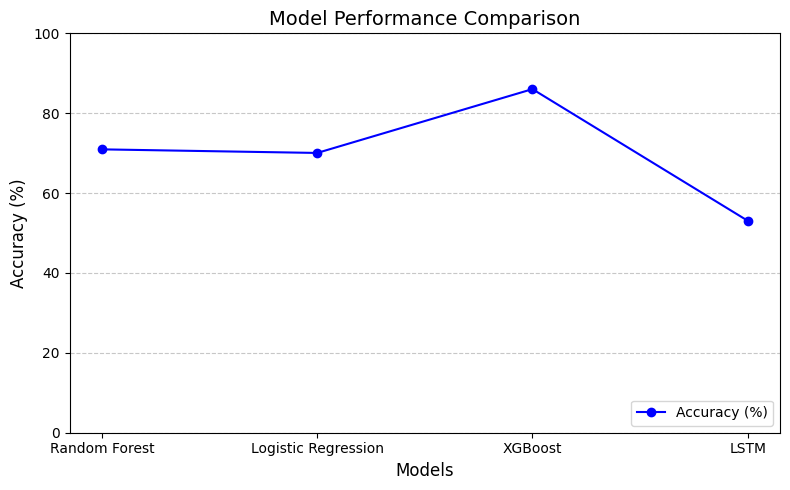

In [96]:
import matplotlib.pyplot as plt

# Data for the performance plot
models = ['Random Forest', 'Logistic Regression', 'XGBoost', 'LSTM']
accuracy = [accuracy_RFC, accuracy_LR, accuracy_XGB, accuracy_LSTM]
plt.figure(figsize=(8, 5))
plt.plot(models, accuracy, marker='o', linestyle='-', color='blue', label='Accuracy (%)')
plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

# Show the line chart
plt.show()

The findings of the study clearly demonstrate the importance of data quality with respect to the model performance. It is also important to note that having a sufficient and diverse set of labeled examples facilitates better model training, as more labeled data improves the models’ generalization ability. However, in situations where such data sets are lacking, more emphasis must be directed towards acquiring or synthesizing new labeled data sets. In this context, the compromises in model architectures are obvious; BERT and LSTM models yield very high accuracy but are also computationally demanding and require substantial hyperparameter tuning. Bookend forests and logistic regression are simpler models that offer good systolic baselines and are ideal for operationally limited situations.Limitations of wide awareness–catching augment can be addressed via improved hyperparameter search for more complex models within a certain task. Social identity, hashtag popularity and engagement history trends could be added during future developments targeting feature engineering.

Particularly, it would be advantageous to combine transformer-based encoders, e.g., BERT, with an XGBoost architecture which would benefit from both approaches. Additionally, dataset expansion through data augmentation is likely to lead to improvement in complex model performance. Moreover, combining diverse models of, say, VADER and XGBoost would lessen the impact of weaknesses of individual approaches and thus refining performance. These measures reinforce the importance of adhering to the data requirements when deciding model architecture.
